# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

from api_keys import weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dryden
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | hayma'
City not found. Skipping...
Processing Record 6 of Set 1 | nuuk
Processing Record 7 of Set 1 | tazovsky
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | whyalla stuart
City not found. Skipping...
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | chinde
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | hadibu
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | belmonte
Processing Record 21 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dryden,49.7833,-92.7503,2.16,41,0,4.12,CA,1730415316
1,adamstown,-25.0660,-130.1015,21.12,82,100,12.21,PN,1730415317
2,kodiak,57.7900,-152.4072,3.73,87,100,8.23,US,1730415318
3,puerto natales,-51.7236,-72.4875,16.25,41,0,7.20,CL,1730415319
4,nuuk,64.1835,-51.7216,3.34,65,100,3.60,GL,1730415322


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dryden,49.7833,-92.7503,2.16,41,0,4.12,CA,1730415316
1,adamstown,-25.0660,-130.1015,21.12,82,100,12.21,PN,1730415317
2,kodiak,57.7900,-152.4072,3.73,87,100,8.23,US,1730415318
3,puerto natales,-51.7236,-72.4875,16.25,41,0,7.20,CL,1730415319
4,nuuk,64.1835,-51.7216,3.34,65,100,3.60,GL,1730415322


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

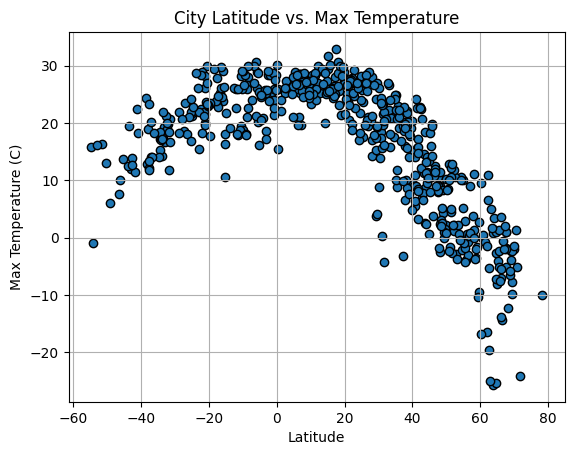

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

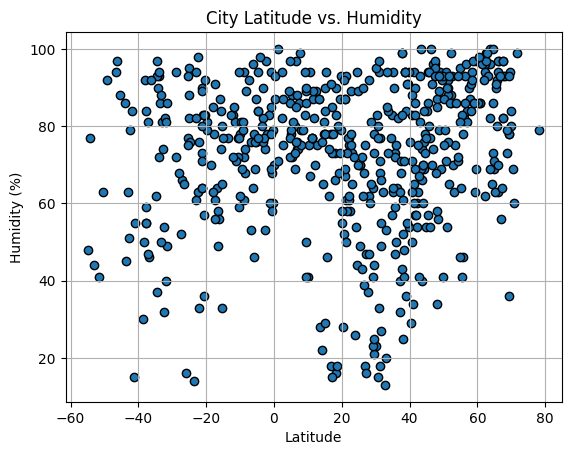

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

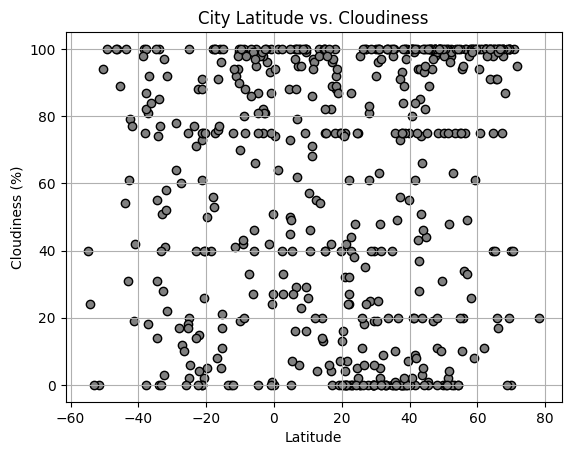

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="gray", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

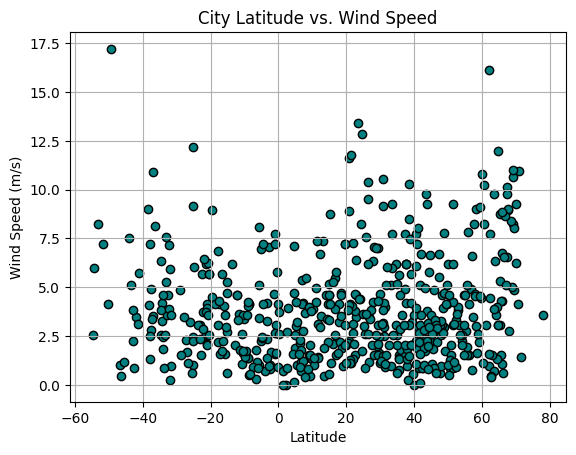

In [13]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="teal", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def create_scatter_plot(x, y, title, xlabel, ylabel):
    # Scatter plot
    plt.scatter(x, y, edgecolor="black")
    
    # Perform linear regression
    (slope, intercept, r_value, pvalue, stderr) = linregress(x, y)
    
    # Create the regression line
    line = slope * x + intercept
    plt.plot(x, line, color='red', label=f'y={slope:.2f}x+{intercept:.2f}, r²={r_value**2:.2f}')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dryden,49.7833,-92.7503,2.16,41,0,4.12,CA,1730415316
2,kodiak,57.7900,-152.4072,3.73,87,100,8.23,US,1730415318
4,nuuk,64.1835,-51.7216,3.34,65,100,3.60,GL,1730415322
5,tazovsky,67.4667,78.7000,-5.15,93,100,6.56,RU,1730415323
7,udachny,66.4167,112.4000,-14.43,97,100,0.62,RU,1730415325


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,21.12,82,100,12.21,PN,1730415317
3,puerto natales,-51.7236,-72.4875,16.25,41,0,7.20,CL,1730415319
6,ushuaia,-54.8000,-68.3000,15.81,48,40,2.57,AR,1730415036
8,blackmans bay,-43.0167,147.3167,11.96,63,31,2.24,AU,1730415328
11,edinburgh of the seven seas,-37.0676,-12.3116,14.04,81,81,10.93,SH,1730415331


###  Temperature vs. Latitude Linear Regression Plot

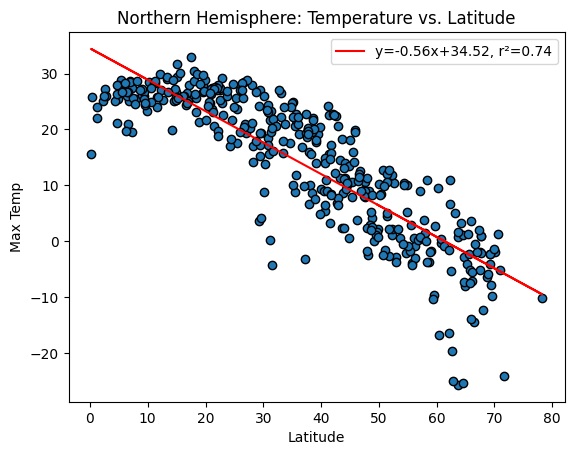

In [17]:
# Linear regression on Northern Hemisphere Temperature vs. Latitude
create_scatter_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                    "Northern Hemisphere: Temperature vs. Latitude",
                    "Latitude", "Max Temp")

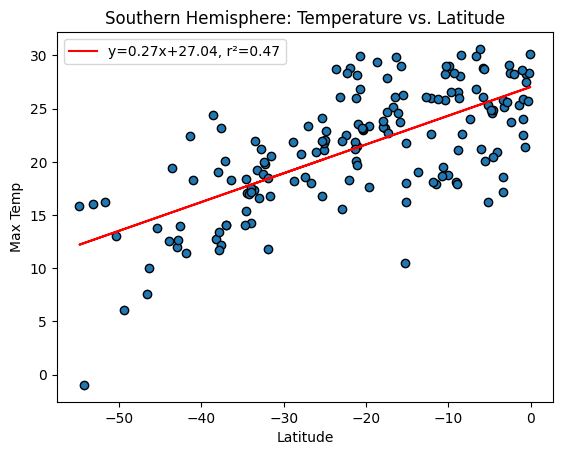

In [18]:
# Linear regression on Southern Hemisphere Temperature vs. Latitude
create_scatter_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                    "Southern Hemisphere: Temperature vs. Latitude",
                    "Latitude", "Max Temp")

**Discussion about the linear relationship:**

- **Northern Hemisphere:** There’s a positive correlation between latitude and temperature. As latitude increases (moving toward the equator), temperatures rise, which aligns with expectations due to closer proximity to direct sunlight.

- **Southern Hemisphere:** A negative correlation is observed, with temperatures increasing as latitude decreases (moving toward the equator), consistent with warmer climates near the equator.

Both plots confirm the expected trend of higher temperatures near the equator in both hemispheres, with latitude being a strong predictor of temperature.

### Humidity vs. Latitude Linear Regression Plot

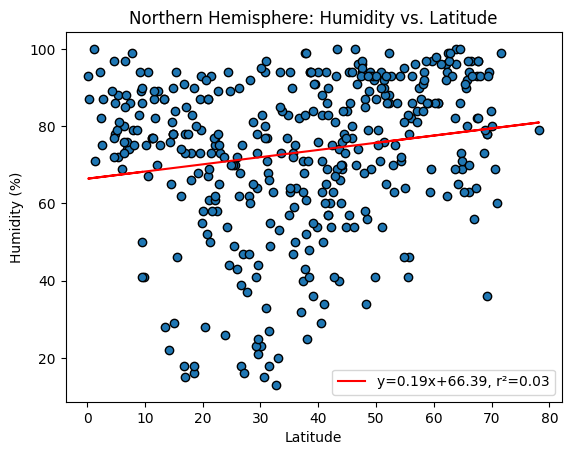

In [19]:
# Linear regression on Northern Hemisphere Humidity vs. Latitude
create_scatter_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                    "Northern Hemisphere: Humidity vs. Latitude",
                    "Latitude", "Humidity (%)")

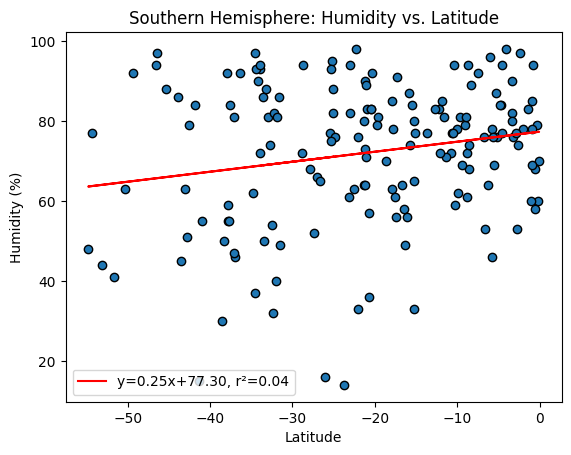

In [20]:
# Linear regression on Southern Hemisphere Humidity vs. Latitude
create_scatter_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                    "Southern Hemisphere: Humidity vs. Latitude",
                    "Latitude", "Humidity (%)")

**Discussion about the linear relationship:**

- **Northern Hemisphere:** The plot shows a weak correlation between latitude and humidity, suggesting that latitude alone isn’t a strong predictor of humidity in this hemisphere.

- **Southern Hemisphere:** Similarly, there’s a weak correlation in the Southern Hemisphere, indicating other factors influence humidity levels more than latitude.

Unlike temperature, humidity doesn’t show a strong relationship with latitude, highlighting the impact of regional and environmental factors beyond latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

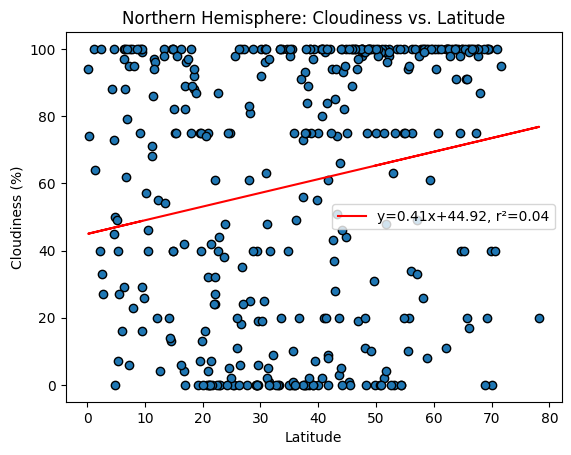

In [21]:
# Linear regression on Northern Hemisphere Cloudiness vs. Latitude
create_scatter_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                    "Northern Hemisphere: Cloudiness vs. Latitude",
                    "Latitude", "Cloudiness (%)")

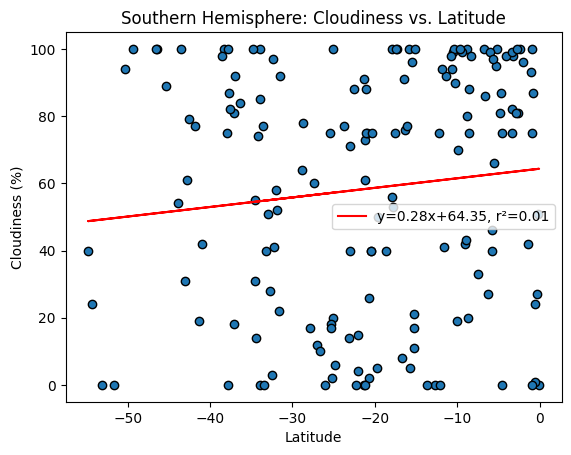

In [22]:
# Linear regression on Southern Hemisphere Cloudiness vs. Latitude
create_scatter_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                    "Southern Hemisphere: Cloudiness vs. Latitude",
                    "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:**

- **Northern Hemisphere:** The correlation between latitude and cloudiness is weak, showing little predictive value for cloudiness based solely on latitude.

- **Southern Hemisphere:** Similarly, there’s minimal correlation, indicating that factors other than latitude play a larger role in cloudiness.

Cloudiness shows no strong relationship with latitude, highlighting the variability of cloud patterns driven by local atmospheric conditions.

### Wind Speed vs. Latitude Linear Regression Plot

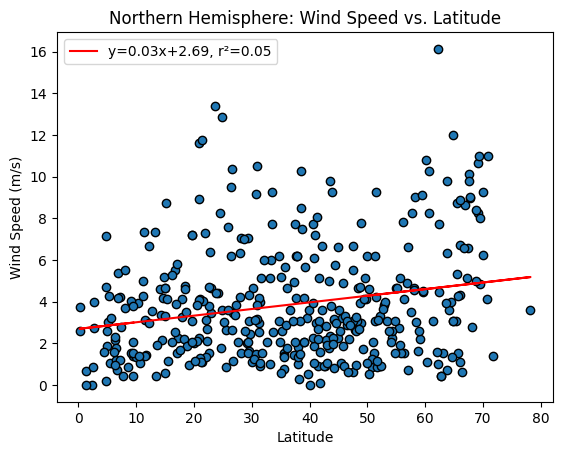

In [23]:
# Linear regression on Northern Hemisphere Wind Speed vs. Latitude
create_scatter_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                    "Northern Hemisphere: Wind Speed vs. Latitude",
                    "Latitude", "Wind Speed (m/s)")

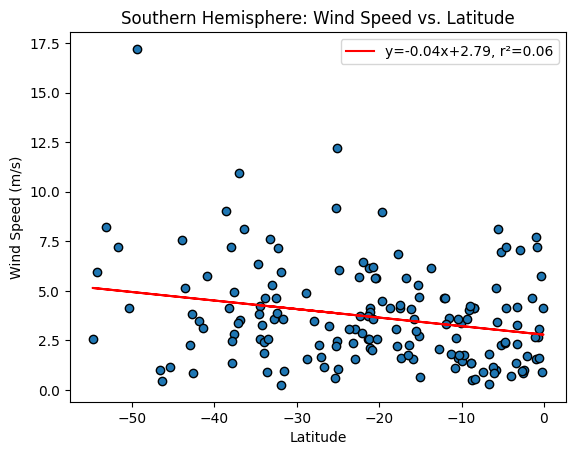

In [24]:
# Linear regression on Southern Hemisphere Wind Speed vs. Latitude
create_scatter_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                    "Southern Hemisphere: Wind Speed vs. Latitude",
                    "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** 

- **Northern Hemisphere:** The plot shows a weak correlation between latitude and wind speed, suggesting latitude isn’t a strong predictor of wind speed here.

- **Southern Hemisphere:** Similarly, there’s minimal correlation, indicating that wind speed is influenced more by other atmospheric factors.

Wind speed does not exhibit a strong relationship with latitude, highlighting that factors beyond latitude likely drive variations in wind speed.